In [33]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("social_network_ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [35]:
X = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [38]:
model_svm = SVC(kernel='linear')
model_svm.fit(X_train_scaler, y_train)


SVC(kernel='linear')

In [39]:
model_svm.score(X_test_scaler, y_test)

0.875

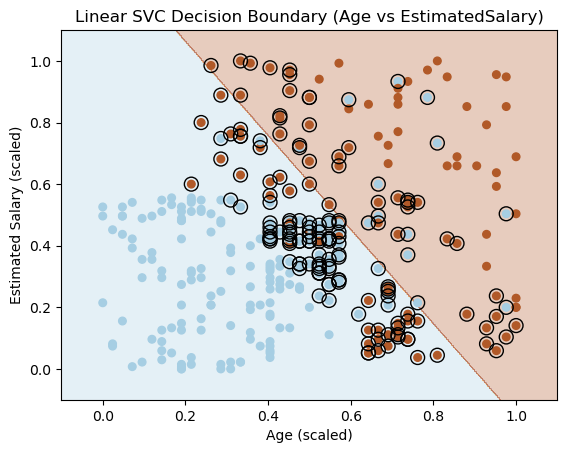

In [17]:

import numpy as np

# Create mesh grid for plotting
x_min, x_max = X_train_scaler[:, 0].min() - 0.1, X_train_scaler[:, 0].max() + 0.1
y_min, y_max = X_train_scaler[:, 1].min() - 0.1, X_train_scaler[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_scaler[:, 0], X_train_scaler[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# Highlight support vectors
plt.scatter(model_svm.support_vectors_[:, 0],
            model_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

plt.title("Linear SVC Decision Boundary (Age vs EstimatedSalary)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()

In [40]:
model_svm1 = SVC(kernel='rbf')
model_svm1.fit(X_train_scaler, y_train)

SVC()

In [41]:
model_svm1.score(X_test_scaler, y_test)


0.925

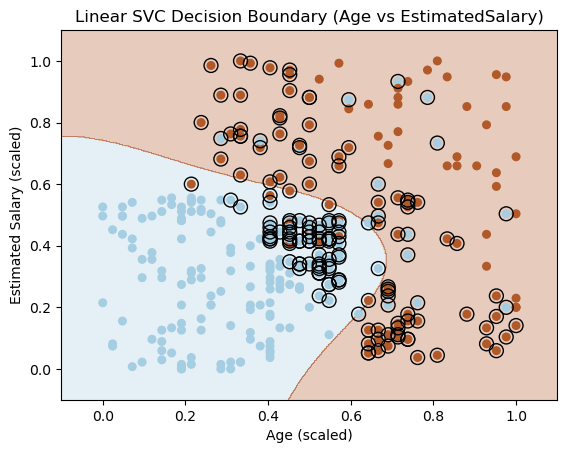

In [18]:
import numpy as np

# Create mesh grid for plotting
x_min, x_max = X_train_scaler[:, 0].min() - 0.1, X_train_scaler[:, 0].max() + 0.1
y_min, y_max = X_train_scaler[:, 1].min() - 0.1, X_train_scaler[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
Z = model_svm1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_scaler[:, 0], X_train_scaler[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# Highlight support vectors
plt.scatter(model_svm.support_vectors_[:, 0],
            model_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

plt.title("Linear SVC Decision Boundary (Age vs EstimatedSalary)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()

In [42]:
model_svm2 = SVC(kernel='poly')
model_svm2.fit(X_train_scaler,y_train)

SVC(kernel='poly')

In [43]:
model_svm2.score(X_test_scaler, y_test)

0.925

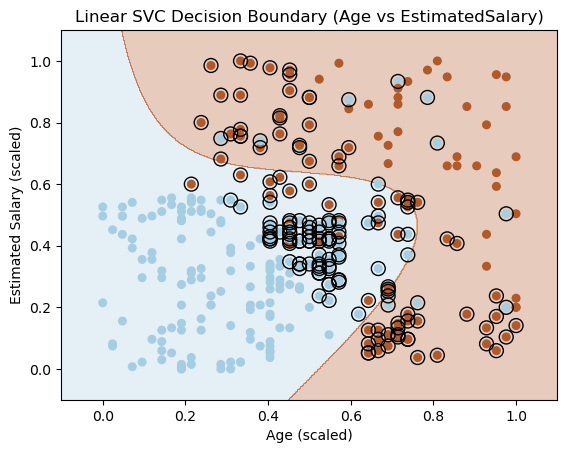

In [44]:
import numpy as np

# Create mesh grid for plotting
x_min, x_max = X_train_scaler[:, 0].min() - 0.1, X_train_scaler[:, 0].max() + 0.1
y_min, y_max = X_train_scaler[:, 1].min() - 0.1, X_train_scaler[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over the grid
Z = model_svm2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_scaler[:, 0], X_train_scaler[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

# Highlight support vectors
plt.scatter(model_svm.support_vectors_[:, 0],
            model_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k')

plt.title("Linear SVC Decision Boundary (Age vs EstimatedSalary)")
plt.xlabel("Age (scaled)")
plt.ylabel("Estimated Salary (scaled)")
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [47]:
yp = model_svm2.predict(X_test_scaler)
print("Confusion Matrix:\n",confusion_matrix(y_test,yp))
print("Accuracy:",accuracy_score(y_test,yp))
print("Recall:",recall_score(y_test,yp))
print("Precision:",precision_score(y_test,yp))
print("F1 Score:",f1_score(y_test,yp))

Confusion Matrix:
 [[48  4]
 [ 2 26]]
Accuracy: 0.925
Recall: 0.9285714285714286
Precision: 0.8666666666666667
F1 Score: 0.896551724137931


In [ ]:
yz = model_svm1.predict(X_test_scaler)
confusion_matrix(y_test,yz)
print("Confusion Matrix:\n",confusion_matrix(y_test,yz))
print("Accuracy:",accuracy_score(y_test,yz))
print("Recall:",recall_score(y_test,yz))
print("Precision:",precision_score(y_test,yz))
print("F1 Score:",f1_score(y_test,yz))

Confusion Matrix:
 [[47  5]
 [ 1 27]]
Accuracy: 0.925
Recall: 0.9642857142857143
Precision: 0.84375
F1 Score: 0.9


In [46]:
xy = model_svm2.predict(X_test_scaler)
print("Confusion Matrix:\n",confusion_matrix(y_test,xy))
print("Accuracy:",accuracy_score(y_test,xy))
print("Recall:",recall_score(y_test,xy))
print("Precision:",precision_score(y_test,xy))
print("F1 Score:",f1_score(y_test,xy))

Confusion Matrix:
 [[48  4]
 [ 2 26]]
Accuracy: 0.925
Recall: 0.9285714285714286
Precision: 0.8666666666666667
F1 Score: 0.896551724137931
